In [ ]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Hotel Booking Dataset – Descripción de los features

| Feature | Description |
|--------|-------------|
| hotel | Hotel type: H1 = Resort Hotel, H2 = City Hotel |
| is_canceled | Whether the booking was canceled (1=yes, 0=no) |
| lead_time | Days between booking and arrival |
| arrival_date_year | Arrival year |
| arrival_date_month | Arrival month (string) |
| arrival_date_week_number | Week number of arrival date |
| arrival_date_day_of_month | Day of month of arrival date |
| stays_in_weekend_nights | Weekend nights (Sat–Sun) stayed or booked |
| stays_in_week_nights | Week nights (Mon–Fri) stayed or booked |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Meal type (SC, BB, HB, FB) |
| country | Country of origin (ISO 3155–3) |
| market_segment | Market segment (TA = Travel Agents, TO = Tour Operators) |
| distribution_channel | Distribution channel (TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest | Whether guest is repeated (1=yes, 0=no) |
| previous_cancellations | Number of previous cancellations |
| previous_bookings_not_canceled | Number of previous non-canceled bookings |
| reserved_room_type | Reserved room code (anonymized) |
| assigned_room_type | Assigned room code (may differ from reserved) |
| booking_changes | Number of changes made to the booking |
| deposit_type | Deposit type (No Deposit, Non Refund, Refundable) |
| agent | Travel agency ID |
| company | Company/Entity ID responsible for booking |
| days_in_waiting_list | Days the booking was on waiting list |
| customer_type | Booking type (Contract, Group, Transient, Transient-party) |
| adr | Average Daily Rate |
| required_car_parking_spaces | Required parking spaces |
| total_of_special_requests | Count of special requests |
| reservation_status | Final status (Canceled, Check-Out, No-Show) |
| reservation_status_date | Date of last reservation status update |



In [2]:
# Importar el csv
df = pd.read_csv('./hotel_bookings.csv')

Análisis Exploratorio del (EDA) y pre-procesamiento de los datos

In [3]:
#observamos el tipo de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
## Convertimos la columna 'reservation_status_date' a formato datetime y luego verificamos que el tipo de dato sea el correcto ya que es una fecha.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [5]:
# Observamos la estructura del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Revisamos las columnas de tipo object del dataset

df.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [7]:
# Revisamos las columnas númericas del dataset
df.select_dtypes(include='number').columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [8]:
#revisamos cuántos valores únicos tiene cada columna categórica 
categoricas=[col for col in df.columns if df[col].dtype=='object']
categoricas=df[categoricas]
categoricas.nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 177
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [9]:
#visualizamos los valores únicos de cada columna categórica a mayor detalle
for col in categoricas:
    print(f"{col}: {categoricas[col].nunique(),df[col].unique()}")



hotel: (2, array(['Resort Hotel', 'City Hotel'], dtype=object))
arrival_date_month: (12, array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object))
meal: (5, array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object))
country: (177, array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE',

In [10]:
# Revisamos el status de valores nulos 
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Verificamos la cantidad de valores nulos en cada columna del dataset y observamos que 'children' tiene 4 nulos, 'country' 488, mientras que 'agent' y 'company' presentan la mayor cantidad con 16,340 y 112,593 , lo cual nos indica que estas columnas podrían requerir imputación o eliminación.


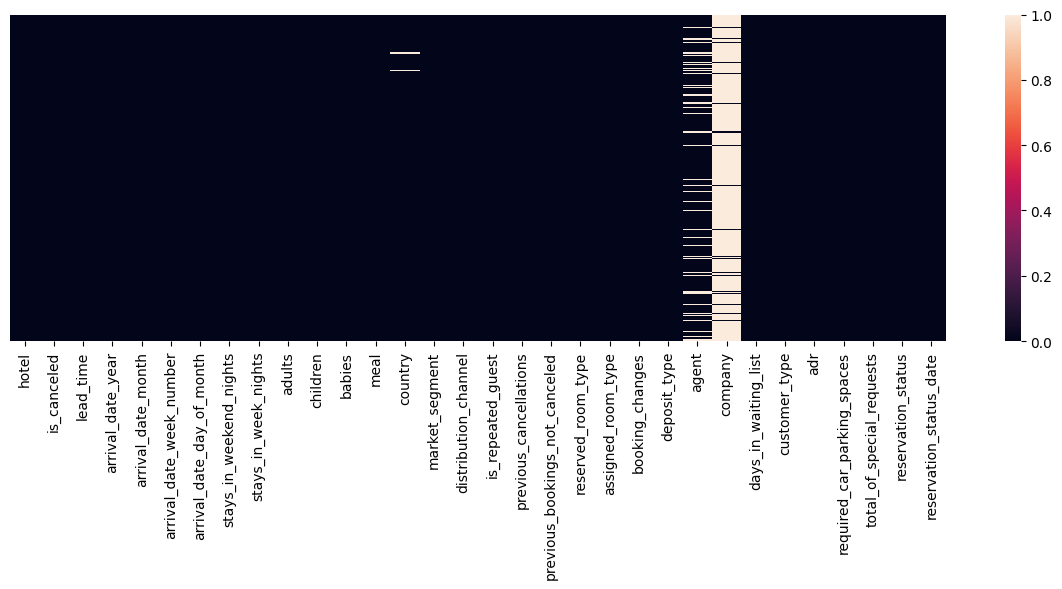

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [12]:
#Columnas como agent y company se trabajan como ID ademas tienen varios valores nulos
df[['agent','company']].dropna(subset=['agent','company']).head(10)

,agent,company
2392,240.0,113.0
2697,185.0,281.0
2867,334.0,281.0
2877,328.0,281.0
2878,326.0,281.0
2879,326.0,281.0
2880,334.0,281.0
2881,328.0,281.0
2882,326.0,281.0
2883,334.0,281.0


Al observar mas a detalle aquellos que cuentan con valores nulos observamos que country tiene algunos, mientras que en company tiene casi el 90% de sus datos ausentes, ademas se trabaja como ID, por lo que consideramos que es irrelevante y decidimos eliminarla, mientras que agent muestra una proporción manejable de nulos.


In [13]:
#eliminamos company por la cantidad de nulos
df.drop(['company'], axis = 1, inplace = True)
df.shape

(119390, 31)

In [14]:
#revisamos children,country y agent.



In [15]:
df["children"].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [16]:
df["country"].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
FJI        1
UMI        1
LCA        1
MRT        1
ASM        1
Name: count, Length: 177, dtype: int64

In [17]:
df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
408.0        1
388.0        1
453.0        1
480.0        1
216.0        1
Name: count, Length: 333, dtype: int64

In [18]:
df['agent'].value_counts()
df = df[(df["agent"].notna())  & (df["country"].notna())  & (df["children"].notna())  ]
df.reset_index(drop=True, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102889,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
102890,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
102891,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
102892,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


Realizamos una limpieza exhaustiva del dataset eliminando valores nulos en las columnas 'agent', 'country' y 'children' y finalmente eliminamos los NaNs

In [19]:
## perdimos unos 17k filas pero no afecta tanto al análisis 
df.shape

(102894, 31)

In [20]:
# Revisamos que ya no haya valores nulls 
df.isna().isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [21]:
# revisamos igualmente los Nan
df.isna().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
# visualizamos las metricas estadisticas para entender como se estan comportando los datos para ver si hay valores atipicos que deberiamos eliminar
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894.000000,102894
mean,0.390314,111.740092,2016.156977,27.339155,15.786771,0.978181,2.589655,1.899926,0.111231,0.007697,0.014034,0.077215,0.024365,0.201780,86.545532,2.619579,104.679911,0.053035,0.605458,2016-07-29 04:59:34.599101952
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000,2016-01-31 00:00:00
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,2016-08-03 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000,2017-02-12 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.487823,107.681013,0.706117,13.279990,8.794042,1.003991,1.905941,0.490891,0.411982,0.097089,0.117631,0.758185,0.435759,0.624954,110.714259,18.797440,50.021697,0.225359,0.799342,NaN


Por lo que podemos observar en las metricas estadisticas podemos decir que ADR (Tarifa diaria promedio) tiene algunos valores atipicos negativos, ademas tiene ticks de 54000 lo cual nos parece extraño,
igualmente adults tiene reservas de hasta 55 personas, pero no lo descartamos ya que podrian ser reservas realizadas por alguna compañia, ademas lead_time nos parece un poco sospechoso ya que el maximo valor es de 700 el cual se aleja del promedio y el tercer cuartil.
Otro dato que nos intereso es que hay reservas con mas de 10 niños o bebes, lo cual nos podria estar indicando que hay algun error, por lo cual lo analisaremos a mayor detalle.

In [23]:
#cosulta de la isntancia donde adr es mayor a 500
df[df['adr']>500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
39574,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19
95409,City Hotel,0,0,2017,May,19,9,0,1,1,...,0,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,2017-05-10


In [24]:
#eliminamos los valores atipicos de adr mayores a 500
df.drop(df[df['adr']>500].index, inplace=True)

In [25]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
12205,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [26]:
df.drop(df[df['adr']<0].index, inplace=True)

Encontramos que hay una instancia con un valor de ADR de 5400, lo caul nos estaria indicando que probablemente fue un error al ingresar los datos y es por eso que procedimos a eliminarlo, igualmente, procedimos a borrar la instancia de 
adr que era negativo, ya que es imposible que ese campo calculado lo sea.


In [27]:

len(df[df['lead_time'] > 500])

479

Igualmente al visualisar las metricas estadisticas observamos que el valor maximo de lead_time era bastante alto en comparacion con el promedio, por lo cual decidimos ver cuantos valores eran mayores a 500 días, en donde encontramos que
se encontraron varias instancias, por lo cual decimimos que no las eliminariasmo ya que podria ser un comportamiento real, por ejemplo casos en donde las personas realizan reservaciones con bastante
anticipación por algun evento u ocación especial.

In [28]:
#Realizamos la consulta para visualizar reservas de mas de 10 adultos
df[df['adults'] >= 10]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1405,Resort Hotel,1,333,2015,September,36,5,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1553,Resort Hotel,1,340,2015,September,37,12,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1679,Resort Hotel,1,347,2015,September,38,19,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1781,Resort Hotel,1,354,2015,September,39,26,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02
1930,Resort Hotel,1,361,2015,October,40,3,2,5,26,...,0,No Deposit,96.0,0,Group,0.0,0,0,Canceled,2015-01-02


Al visualizar las reservas que contenian más de 10 adultos observamos que el tio de cliente generalmente es de Grupo, haciendo sentido que las reservaciones sean para un grupo grande de dultos, por lo cual este tipod e reservas se encontrarian justificados.


In [29]:
#revisamos consultas de children y babies ya que habian reservas con mas de 10 niños o bebes 
df[df['children'] >= 10][['children']].sort_values(by='children', ascending=False).count()


children    1
dtype: int64

In [30]:
#eliminamos la aisntancia donde children es igual a 10
df.drop(df[df['children'] == 10].index, inplace=True)

In [31]:
#revisamos  las instancias donde babies es mayor a 3
df[df['babies']>=3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
37748,City Hotel,0,37,2016,January,3,12,0,2,2,...,1,No Deposit,9.0,0,Transient,84.45,0,1,Check-Out,2016-01-14
67030,City Hotel,0,11,2015,October,42,11,2,1,1,...,1,No Deposit,95.0,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


In [32]:
#borrramos las isntancias de babies mayores a 3
df.drop(df[df['babies'] > 3].index, inplace=True)

In [33]:
# ver si hay reservaciones sin adultos pero con niños contar 
((df["adults"] == 0) & ((df["children"] > 0) | (df["babies"] > 0)))

0         False
1         False
2         False
3         False
4         False
          ...  
102889    False
102890    False
102891    False
102892    False
102893    False
Length: 102888, dtype: bool

In [34]:
# Reservas donde no hay adultos pero sí hay niños o bebés
df[(df["adults"] == 0) & ((df["children"] > 0) | (df["babies"] > 0))][
    ["adults", "children", "babies", "reservation_status", "reservation_status_date"]
]


,adults,children,babies,reservation_status,reservation_status_date
32578,0,2.0,0,Check-Out,2015-08-14
36355,0,2.0,0,Canceled,2015-09-02
37269,0,3.0,0,Canceled,2015-12-10
37287,0,2.0,1,Check-Out,2015-12-19
37323,0,2.0,0,Check-Out,2015-12-26
...,...,...,...,...,...
100737,0,2.0,0,Check-Out,2017-07-30
100808,0,2.0,0,Check-Out,2017-07-31
100873,0,2.0,0,Check-Out,2017-08-02
100898,0,2.0,0,Check-Out,2017-08-02


Igualmente pensamos en revisar si habian reservas en las cualaes no hay adultos registrados pero si niños, lo cual no tendria ninguns entido tener ese tipo de registros, por lo cual procedimos a eliminarlos.

In [35]:
df = df[~((df["adults"] == 0) & ((df["children"] > 0) | (df["babies"] > 0)))]


In [36]:
# volvemos a hacer describe para ver los datos y revisar que no se nos pase nada
df.describe()



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682.000000,102682
mean,0.390322,111.703775,2016.156843,27.340887,15.785055,0.978117,2.589548,1.903751,0.107341,0.007499,0.014053,0.077365,0.024396,0.201476,86.699266,2.624988,104.661378,0.053135,0.604643,2016-07-29 04:22:03.854229504
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000,2016-01-31 00:00:00
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,2016-08-03 00:00:00
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.930000,0.000000,1.000000,2017-02-13 00:00:00
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,3.000000,2.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,450.000000,3.000000,5.000000,2017-09-14 00:00:00
std,0.487825,107.703022,0.706421,13.276989,8.794078,1.004096,1.906546,0.483941,0.402281,0.087504,0.117710,0.758954,0.436163,0.624439,110.772174,18.816458,47.222302,0.225559,0.798905,NaN


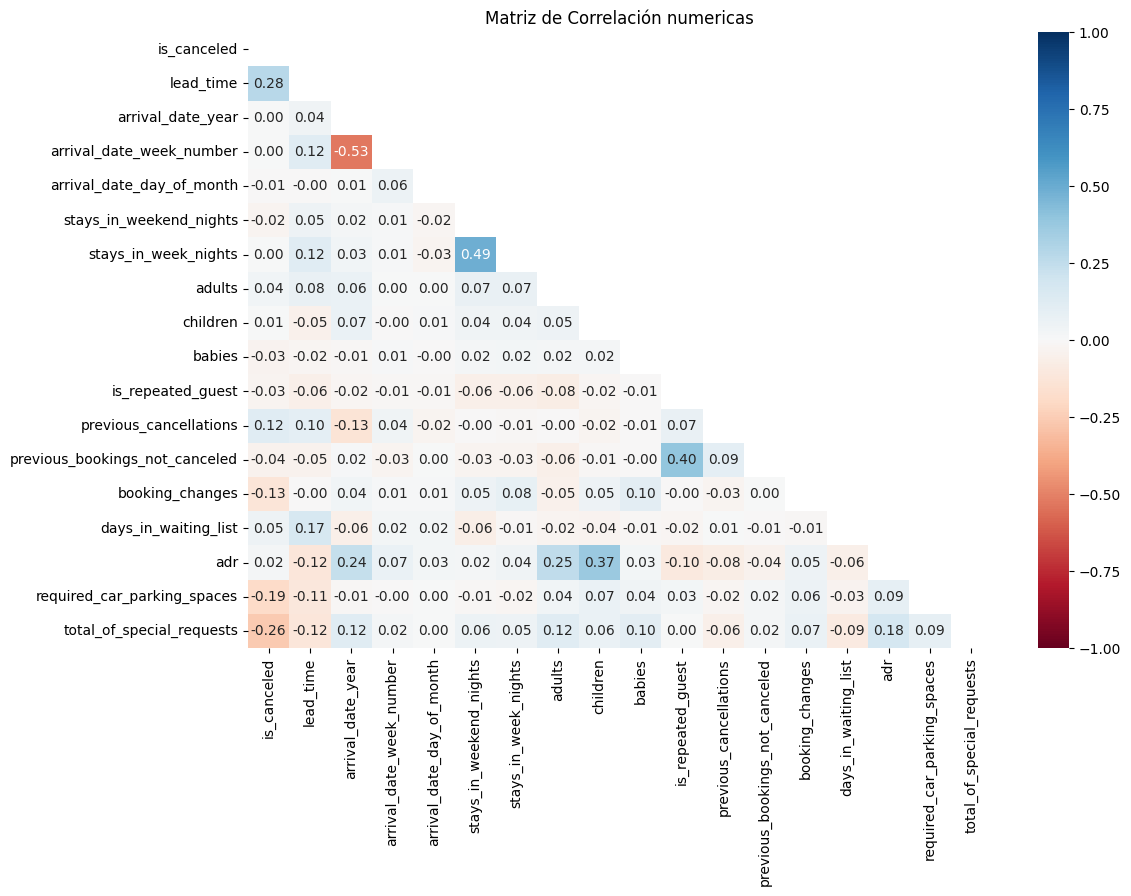

In [37]:
variables_numericas = ['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

correlacion = df[variables_numericas].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    correlacion,
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    mask=np.triu(correlacion)
)
plt.title("Matriz de Correlación numericas")
plt.show()

La matriz de correlación revela que 'is_canceled' tiene correlaciones débiles con la mayoría de variables. 
El predictor más fuerte es 'lead_time' (0.29), indicando que reservas hechas con mayor anticipación tienen más probabilidad de cancelarse. 
Las correlaciones negativas más importantes son 'total_of_special_requests' (-0.23) y 'required_car_parking_spaces' (-0.20), 
sugiriendo que clientes con mayor compromiso (solicitudes especiales, estacionamiento) cancelan menos.

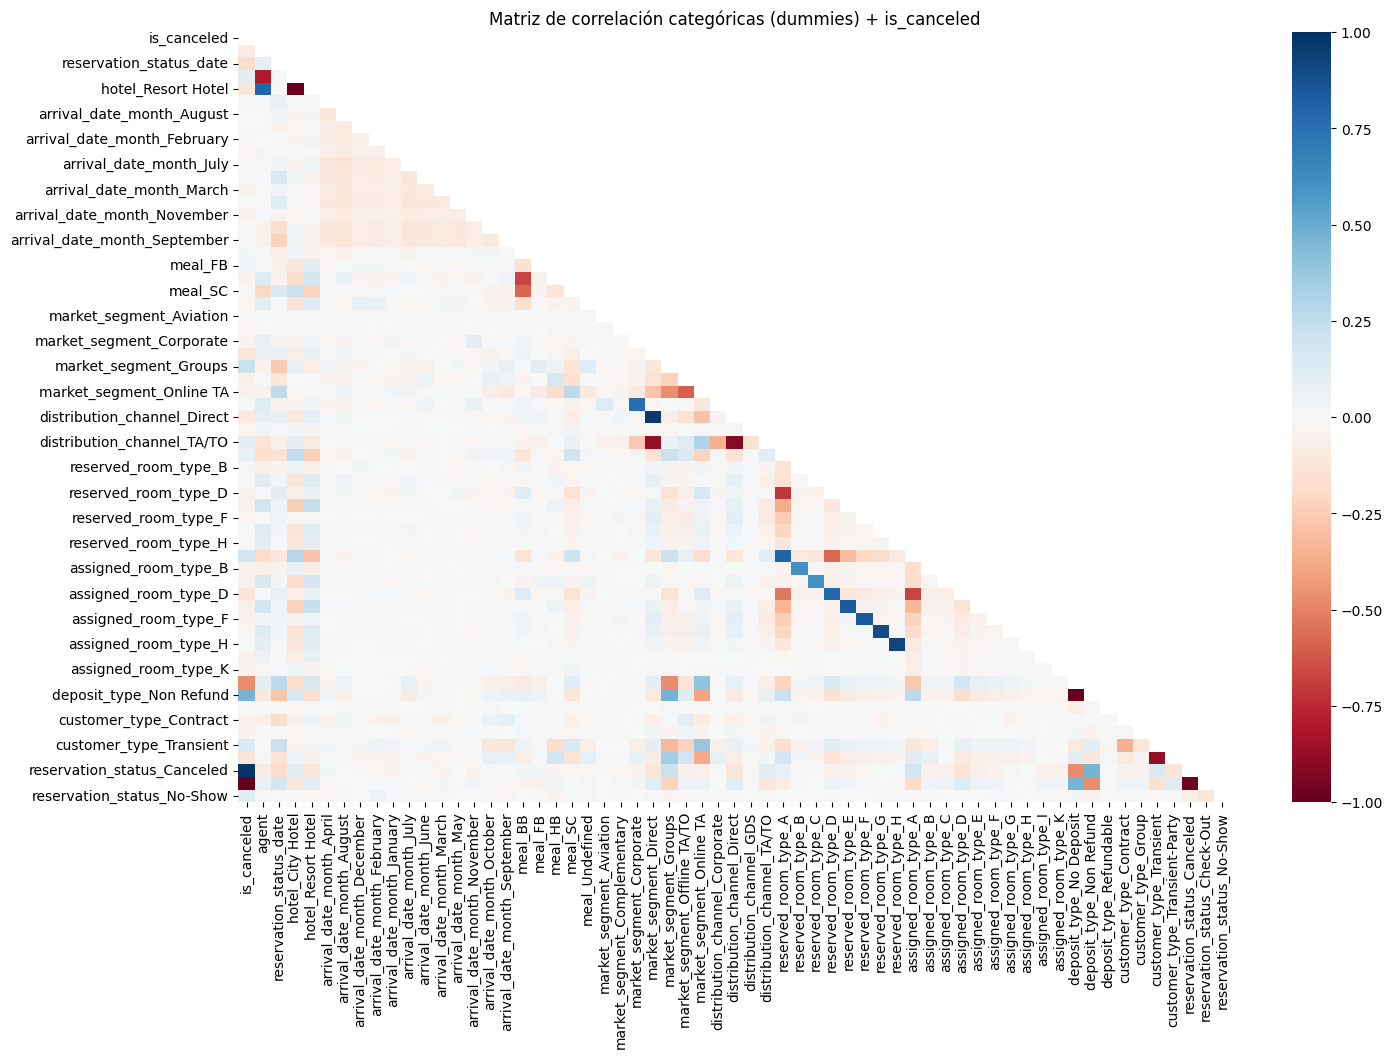

In [38]:
df_model = df.copy()
dummy = df_model.drop(columns=['country'])
df_model = pd.get_dummies(dummy, dtype='int')

# solo columnas dummy (excluimos numéricas originales)
dummies_only = df_model.drop(columns=[col for col in variables_numericas if col != 'is_canceled'])

corr_cat = dummies_only.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(
    corr_cat,
    cmap="RdBu",
    vmin=-1,
    vmax=1,
    mask=np.triu(corr_cat),
    annot=False
)
plt.title("Matriz de correlación categóricas (dummies) + is_canceled")
plt.show()



/tmp/ipykernel_297/3078756864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat_corr.values, y=top_cat_corr.index, palette="viridis")


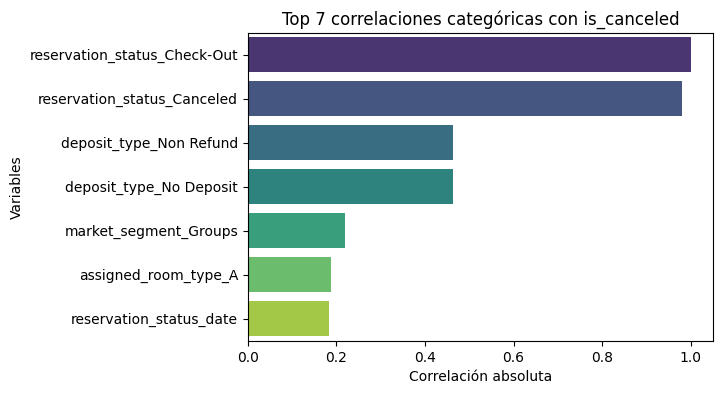

In [39]:
top_cat_corr = corr_cat['is_canceled'].drop('is_canceled').abs().sort_values(ascending=False).head(7)
top_cat_corr
plt.figure(figsize=(6,4))
sns.barplot(x=top_cat_corr.values, y=top_cat_corr.index, palette="viridis")
plt.title("Top 7 correlaciones categóricas con is_canceled")
plt.xlabel("Correlación absoluta")
plt.ylabel("Variables")
plt.show()



Las variables categóricas con mayor asociación a la cancelación corresponden al estatus de la reserva y al tipo de depósito,
lo que indica que las condiciones de pago y el resultado final del booking son los principales impulsores del comportamiento de cancelación,
seguidos por contribuciones menores de segmentos de mercado y tipo de habitación.
Check-Out no es un factor explicativo, sino solo un estado final del booking, por lo cual su alta correlación no tendria relevnacia en las cancelaciones.

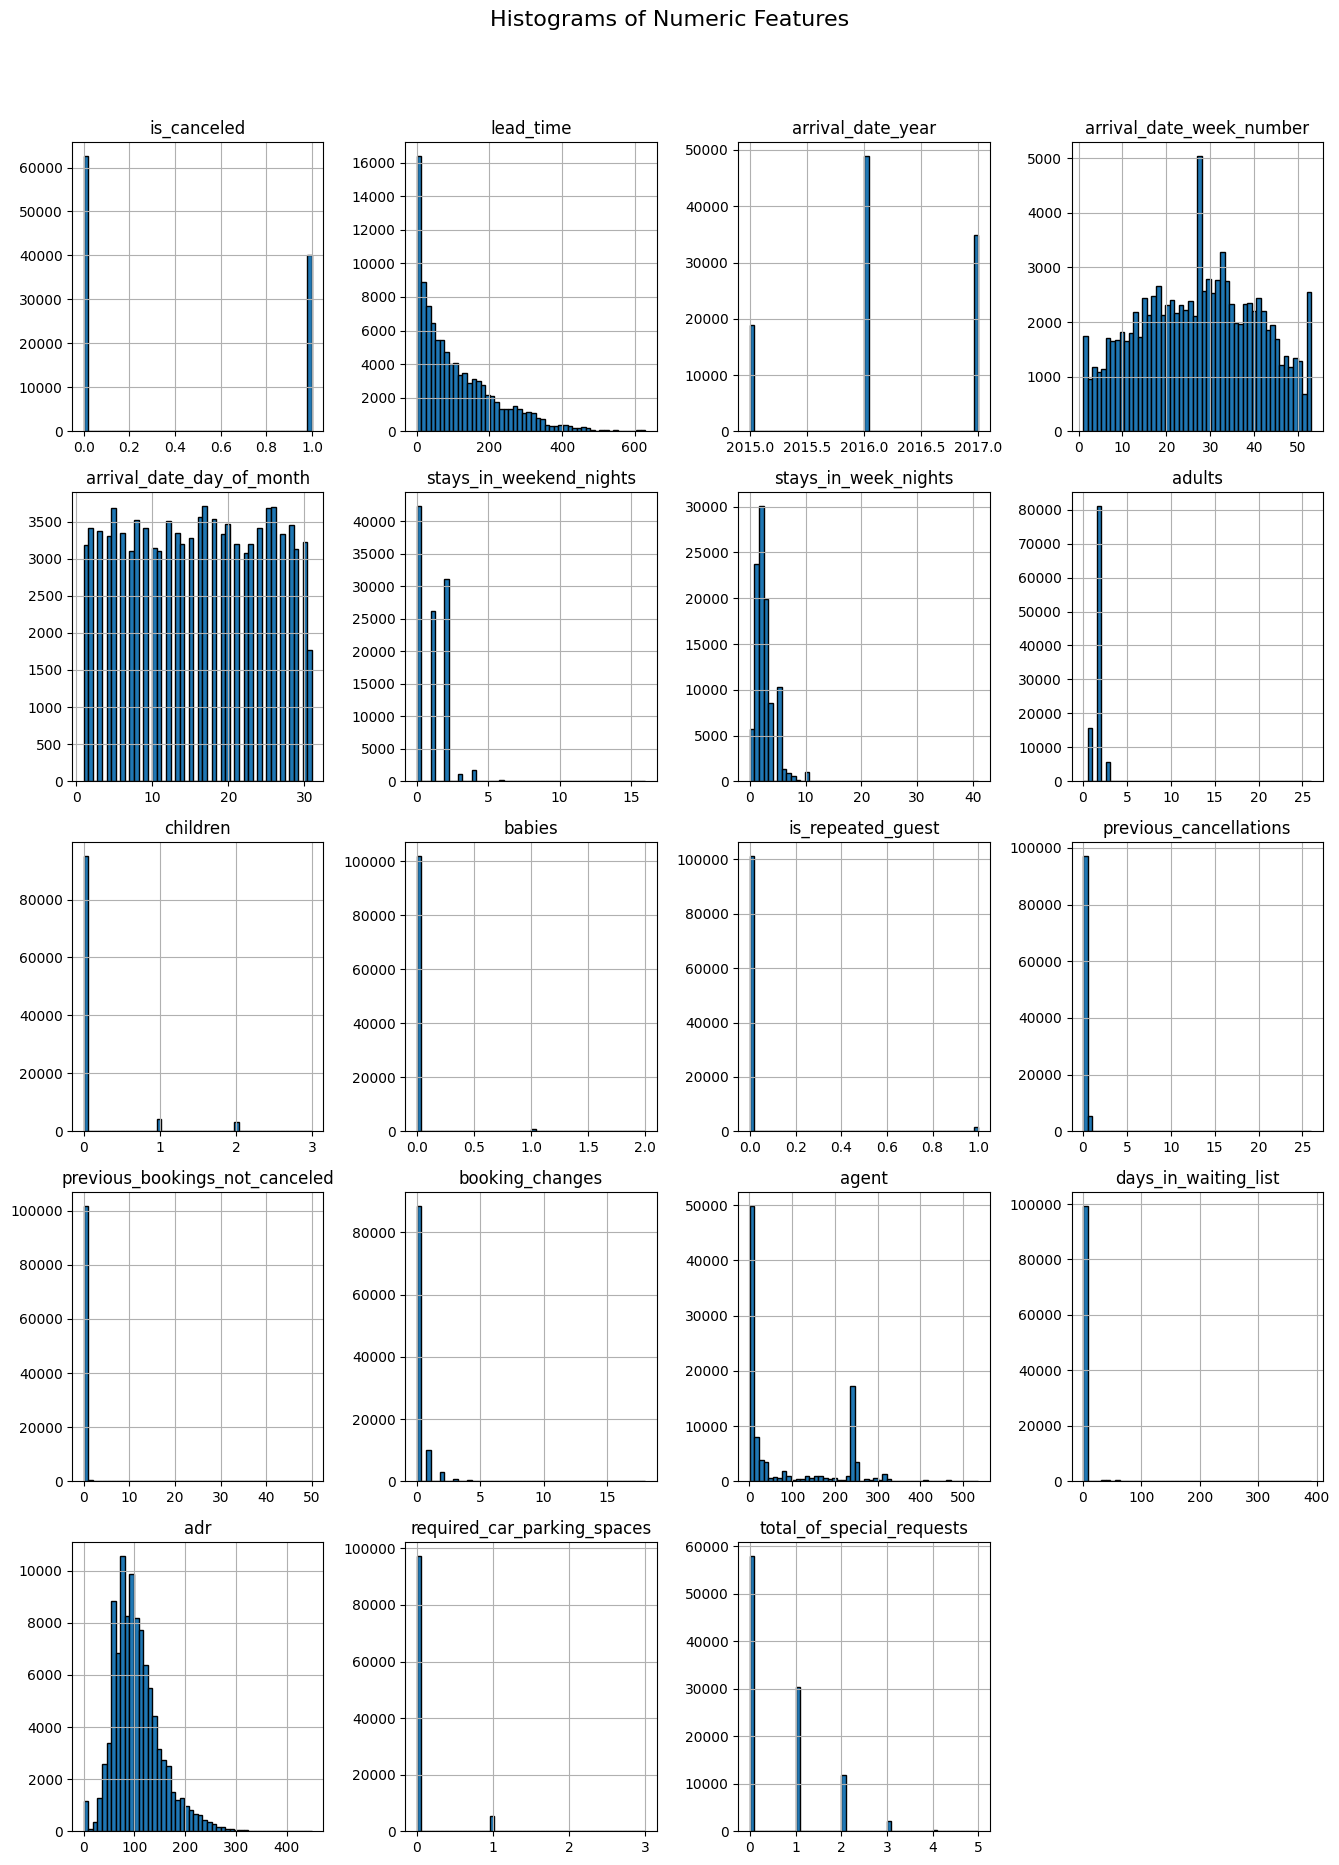

In [40]:
col_numericas = df.select_dtypes(include=['int64', 'float64']).columns
df[col_numericas].hist(bins=50, figsize=(15, 20), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

In [41]:
#observamos la distribucion de la variable objetivo
print(df['is_canceled'].value_counts())
print(df['is_canceled'].dtype)


is_canceled
0    62603
1    40079
Name: count, dtype: int64
int64


Analisando la relación entre los features


In [42]:
# Escogemos nuestra paleta de colores
sns.color_palette("hls")


[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

/tmp/ipykernel_297/3901732370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_canceled', data=df, palette="hls")


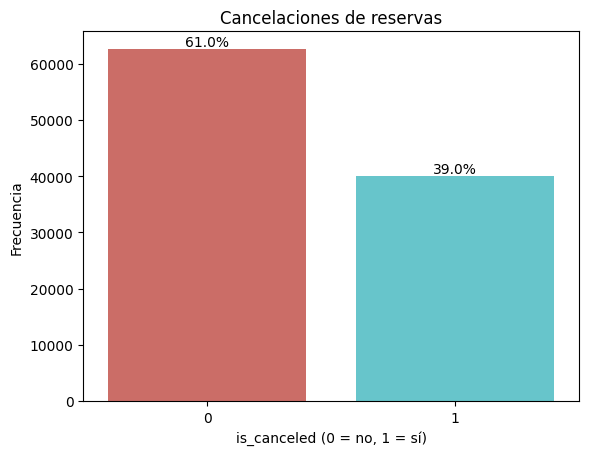

In [43]:
# revisamos que tan balanceada esta nuestra variable objetivo 

count = df['is_canceled'].value_counts(normalize=True) * 100  

ax = sns.countplot(x='is_canceled', data=df, palette="hls")
plt.title("Cancelaciones de reservas")
plt.xlabel("is_canceled (0 = no, 1 = sí)")
plt.ylabel("Frecuencia")

for p in ax.patches:
    height = p.get_height()
    porcentaje = (height / len(df) * 100)
    ax.text(
        p.get_x() + p.get_width()/2,
        height,
        f"{porcentaje:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()



Al observar el grafico nos damos cuenta que nuestra variable objetivo no esta tan desvalanceada, un 39%, por lo cual procemedmos a realizar los graficos correspondeintes para obervar su relacion con los otros features.

Análisis de nuestra variable objetivo

/tmp/ipykernel_297/1615552623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, palette="hls")


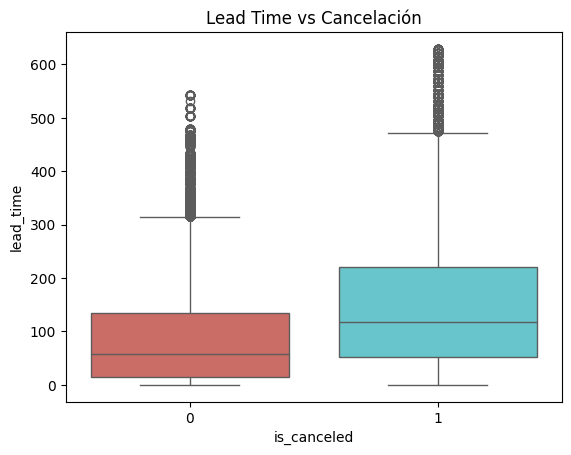

In [44]:
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette="hls")
plt.title("Lead Time vs Cancelación")
plt.show()


Como sabemos el lead time es la variable numérica con mayor correlación con la cancelación (~0.23) y graficando el boxplot  podemos ver que las reservas que se cancelan suelen hacerse con mucha mayor anticipación que las que no se cancelan, por lo que podemos decir que  un lead time alto aumenta la probabilidad de cancelación

/tmp/ipykernel_297/787897658.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df, palette="hls")


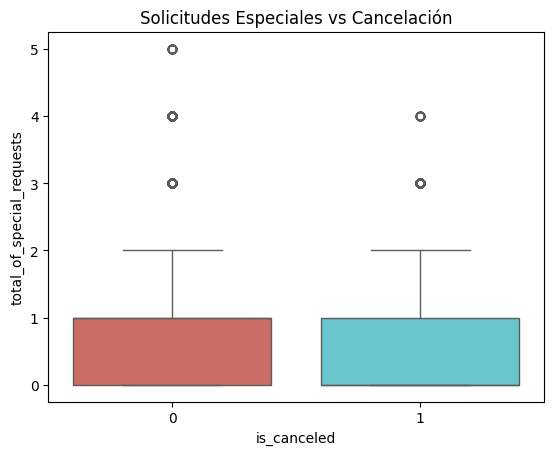

In [45]:
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df, palette="hls")
plt.title("Solicitudes Especiales vs Cancelación")
plt.show()


El número de solicitudes especiales es muy similar entre reservas canceladas y no canceladas, por lo que esta variable no muestra relación significativa con la cancelación.

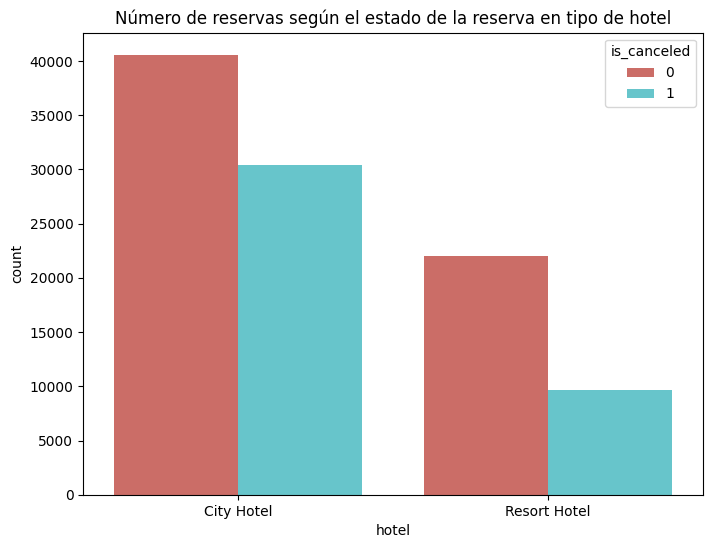

In [46]:
sns.set_palette("hls")
plt.figure(figsize = (8,6))
sns.countplot(
    x='hotel',
    data=df,
    hue='is_canceled',
    order=df['hotel'].value_counts().index,
    palette="hls"
)
plt.title("Número de reservas según el estado de la reserva en tipo de hotel")
plt.show()

In [47]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              40575
              1              30396
Resort Hotel  0              22028
              1               9683
Name: count, dtype: int64

Los hoteles de la ciudad tienen una tasa de cancelación más alta que los resorts.
Alrededor del 30% en los resorts y más del 50% en los urbanos.

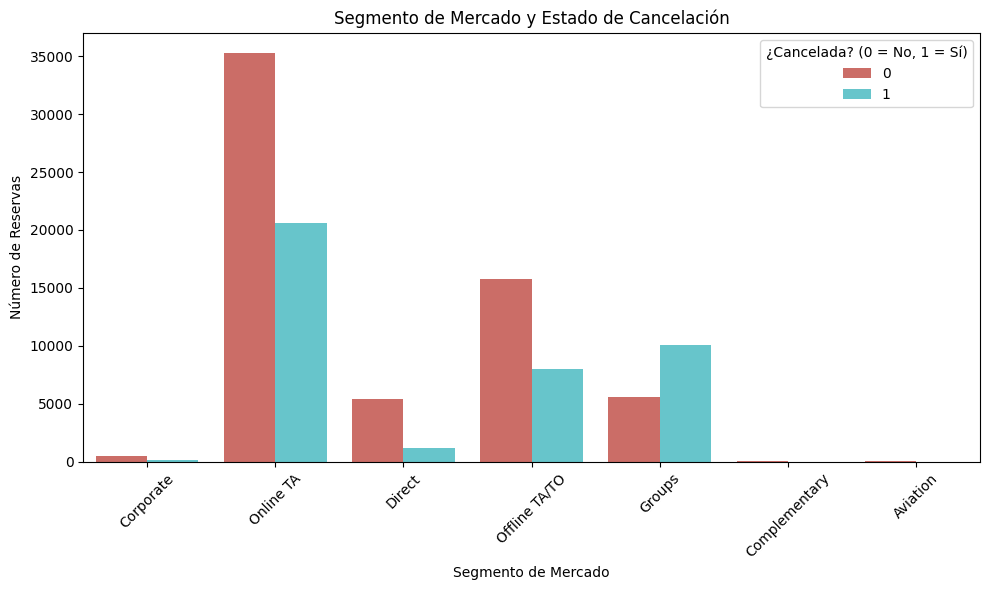

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

sns.countplot(
    x='market_segment',
    data=df,
    hue='is_canceled',
    palette="hls",
    ax=ax
)

ax.set_title("Segmento de Mercado y Estado de Cancelación")
ax.set_xlabel("Segmento de Mercado")
ax.set_ylabel("Número de Reservas")
ax.legend(title="¿Cancelada? (0 = No, 1 = Sí)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las tasas de cancelación suelen ser altas en las reservas online, presencial y de grupo.

Text(0.5, 1.0, 'Lead Time por Año de Llegada y Cancelación')

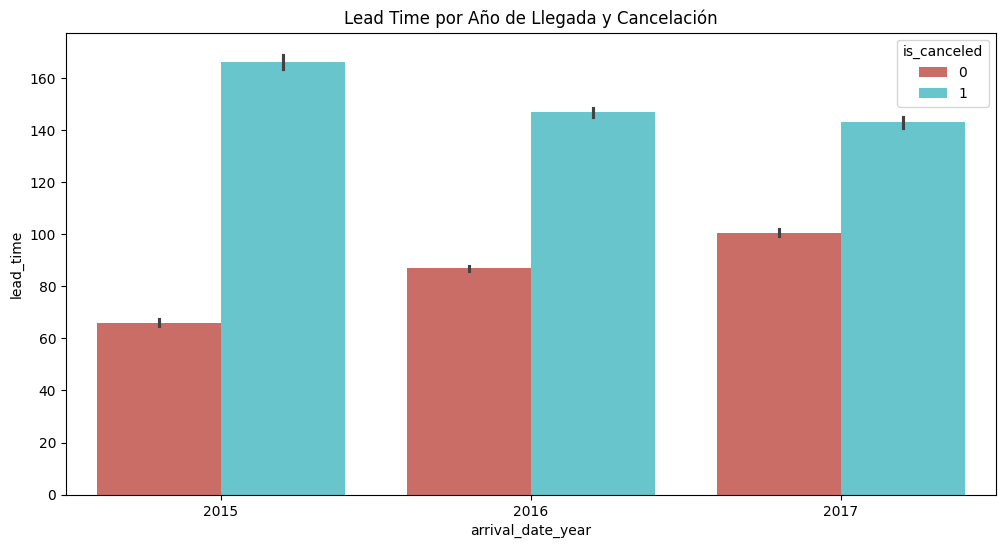

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette="hls")
plt.title("Lead Time por Año de Llegada y Cancelación")

Como podemos ver en el grafico sin importar el año las reservas canceladas tienen un lead time mayor que las no canceladas, confirmando la relación consistente entre anticipación y cancelación

In [50]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.395146
2016    0.383461
2017    0.397327
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Reservas por Año de Llegada y Tipo de Hotel')

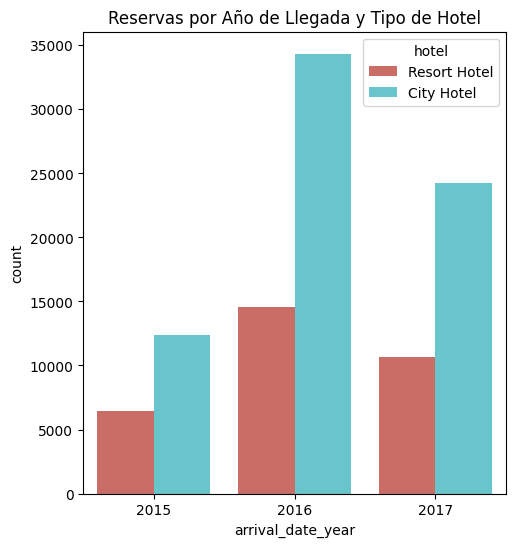

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette="hls")
plt.title("Reservas por Año de Llegada y Tipo de Hotel")

La grafica muestra que City Hotel tiene una mayor cantidad de reservas en todos los años analizados, mientras que Resort Hotel se mantiene más estable. Esto explica parcialmente por qué City Hotel concentra más cancelaciones

/tmp/ipykernel_297/2356601939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")


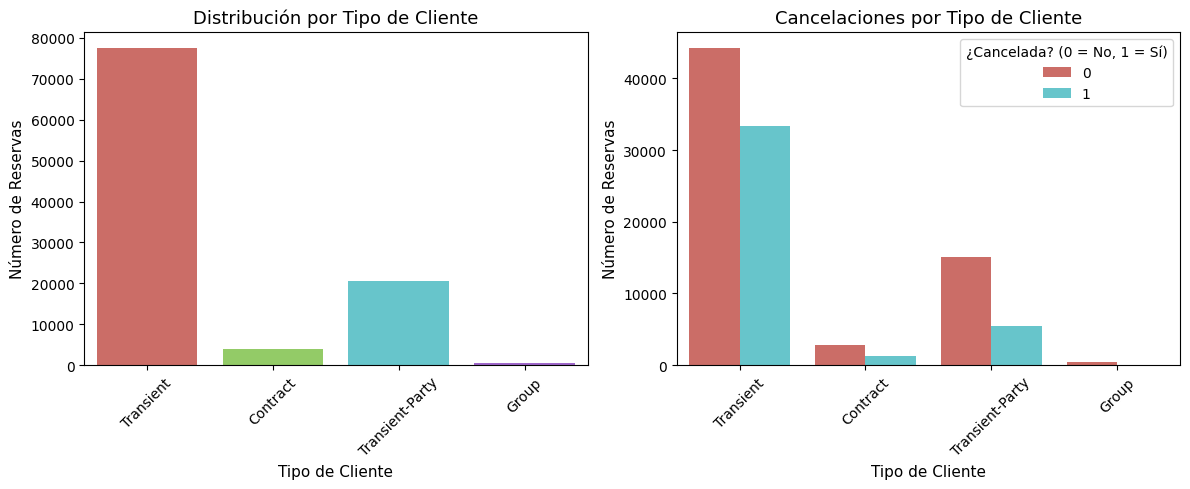

In [52]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


sns.countplot(x='customer_type', data=df, ax=ax[0],palette="hls")
ax[0].set_title("Distribución por Tipo de Cliente", fontsize=13)
ax[0].set_xlabel("Tipo de Cliente", fontsize=11)
ax[0].set_ylabel("Número de Reservas", fontsize=11)
ax[0].tick_params(axis='x', rotation=45)


sns.countplot(x='customer_type', data=df, hue='is_canceled', ax=ax[1], palette="hls")
ax[1].set_title("Cancelaciones por Tipo de Cliente", fontsize=13)
ax[1].set_xlabel("Tipo de Cliente", fontsize=11)
ax[1].set_ylabel("Número de Reservas", fontsize=11)
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title="¿Cancelada? (0 = No, 1 = Sí)", fontsize=10)

plt.tight_layout()
plt.show()


El tipo de cliente Transient concentra la mayoría de las reservas y también la mayor proporción de cancelaciones.
En cambio, Contract casi no cancela, mostrando un comportamiento mucho más estable.

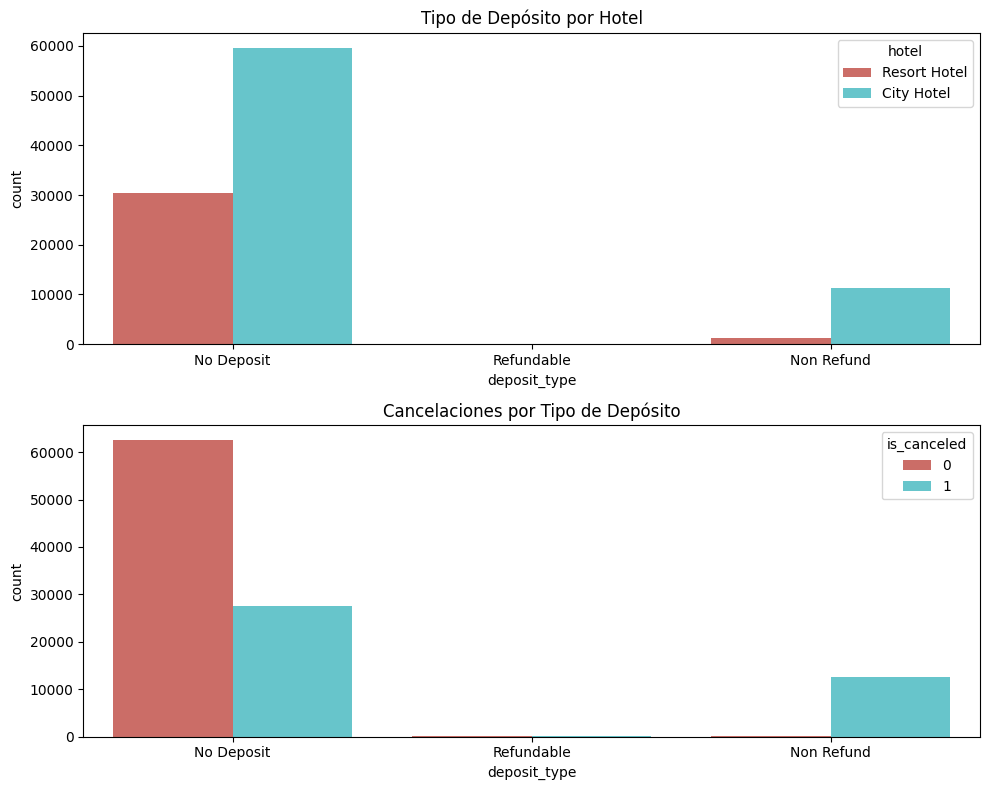

In [53]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel', ax = ax[0],palette="hls")
ax[0].set_title("Tipo de Depósito por Hotel")
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled', ax = ax[1], palette="hls")
ax[1].set_title("Cancelaciones por Tipo de Depósito")
plt.tight_layout()
plt.show()

mientras que las reservas con depósito reembolsable cancelan mucho menos y las Non Refund prácticamente no se cancelan, ya que implicaria una pérdida económica directa para los clientes.

/tmp/ipykernel_297/4230230754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")


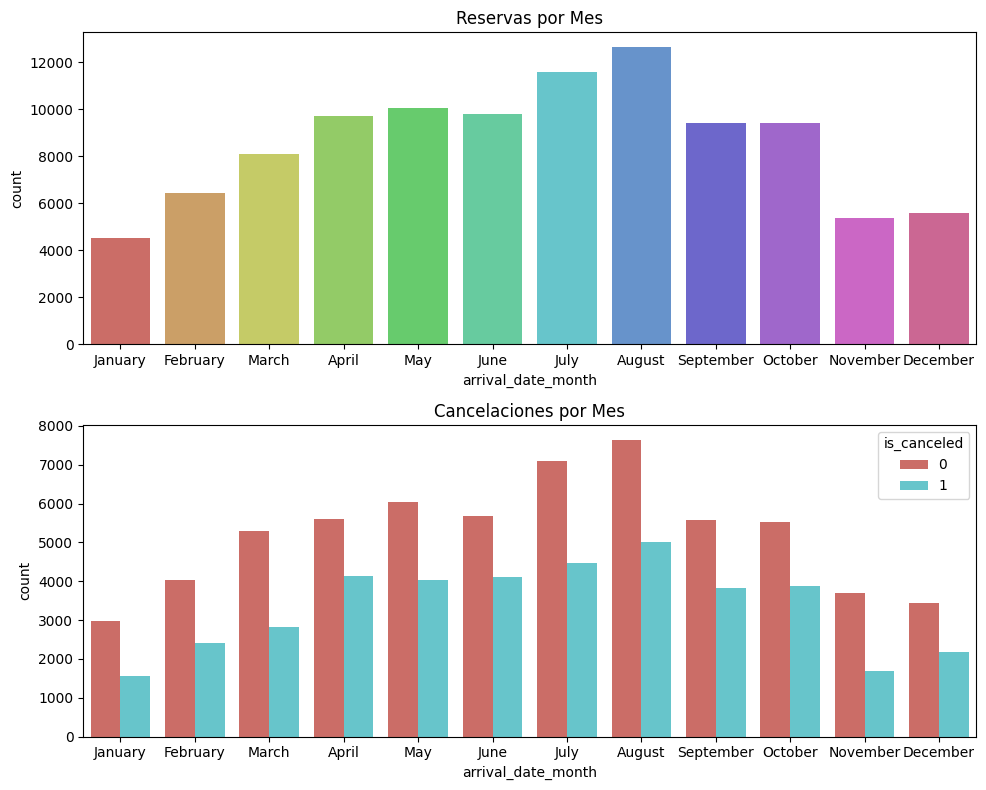

In [54]:
order = ['January',
 'February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,8))
sns.countplot(x = 'arrival_date_month', data = df, ax = ax[0], order = order, palette="hls")
ax[0].set_title("Reservas por Mes")
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', ax = ax[1], order = order, palette="hls")
ax[1].set_title("Cancelaciones por Mes")
plt.tight_layout()
plt.show()

Los meses con mayor volumen de reservas (junio–agosto) también presentan más cancelaciones, aunque la proporción general 
de cancelación se mantiene estable a lo largo del año

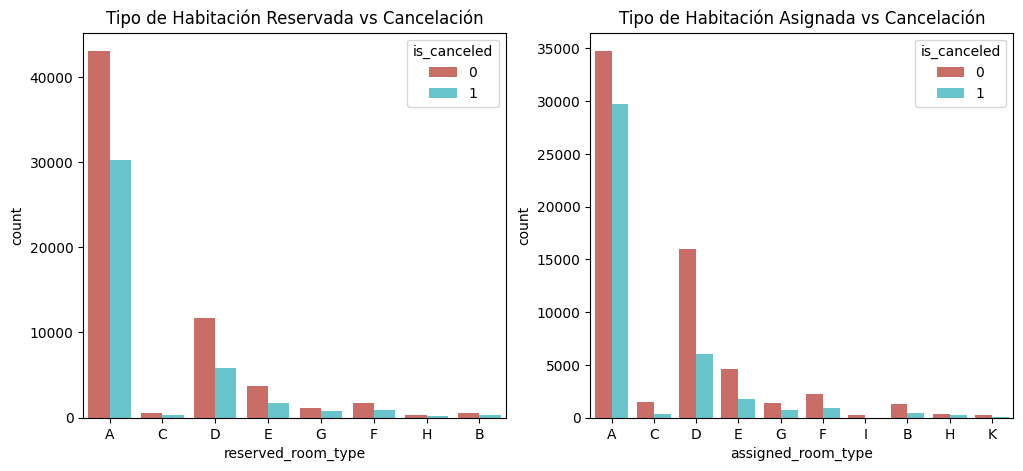

In [55]:

_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df,  ax = ax[0], palette="hls")
ax[0].set_title("Tipo de Habitación Reservada vs Cancelación")
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df,  ax = ax[1], palette="hls")
ax[1].set_title("Tipo de Habitación Asignada vs Cancelación")
plt.show()


Los tipos de habitación A, D y E tienen un nivel de reserva y asignación bastante alto. Sin embargo, como resultado, también tienen una alta tasa de cancelación.  un motivo de cancelación podría ser la asignación de un tipo de habitación no deseado. 

/tmp/ipykernel_297/587889739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unwanted_room'] = unwanted_room


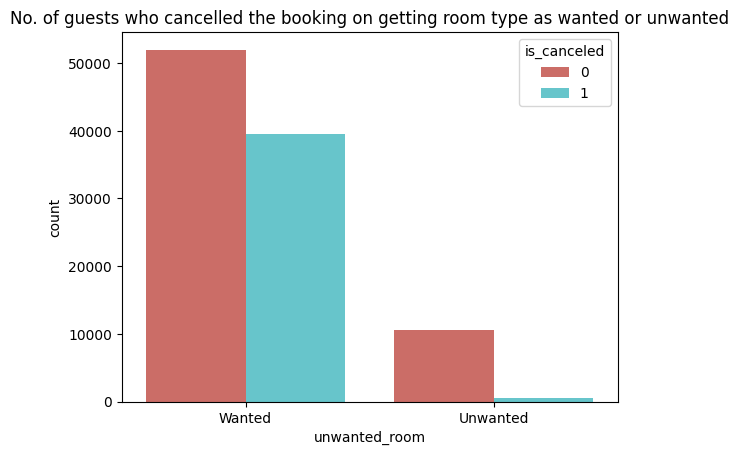

In [ ]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'SI', 'NO')
df['unwanted_room'] = unwanted_room
sns.countplot(x = 'unwanted_room', data = df, hue = 'is_canceled', palette="hls")
plt.title("Cancelaciones según si la habitación asignada era deseada o no")
plt.show()


Aunque inicialmente pensamos que una reserva se cancelaría con mayor probabilidad cuando el tipo de habitación asignado no coincidía con el solicitado, los datos muestran que la tasa de cancelación en estos casos es muy baja.
Esto significa que la diferencia entre la habitación reservada y la asignada no parece influir de forma significativa en las cancelaciones.

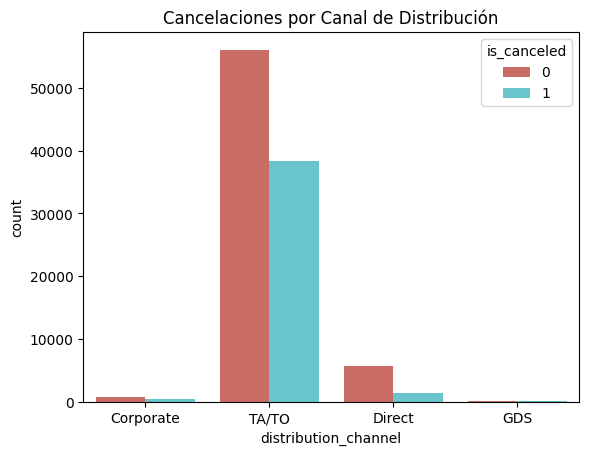

In [57]:
sns.countplot(x='distribution_channel', hue='is_canceled', data=df, palette="hls")
plt.title("Cancelaciones por Canal de Distribución")
plt.show()


Podemos observar en la grafica  que el canal TA/TO concentra la mayoría de las reservas y también el mayor número de cancelaciones, el cual es el mas relevante, mientras que los canales Direct, Corporate y GDS tienen un volumen mucho menor, con pocas cancelaciones en comparación.

MODELO

In [58]:
[col for col in df_model.columns if col.startswith('reservation_status')]


['reservation_status_date',
 'reservation_status_Canceled',
 'reservation_status_Check-Out',
 'reservation_status_No-Show']

In [59]:

df_model = df_model.loc[:, ~df_model.columns.str.startswith('reservation_status')]

leak_cols = [
    'assigned_room_type',
    'booking_changes',
    'days_in_waiting_list'
]

df_model = df_model.drop(columns=leak_cols, errors='ignore')


eliminamos estas porque esas columnas no existen en el momento real de la reserva, solo existen después del resultado.

In [60]:
df_model.select_dtypes(include='object').columns


Index([], dtype='object')

In [61]:
df_model.select_dtypes(include='datetime').columns


Index([], dtype='object')

In [62]:
df_model.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,9,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,85,2015,27,1,0,3,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


Observamos que los datos esten alineados y no veamos nuemros extraños.

In [63]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102682 entries, 0 to 102893
Data columns (total 72 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     102682 non-null  int64  
 1   lead_time                       102682 non-null  int64  
 2   arrival_date_year               102682 non-null  int64  
 3   arrival_date_week_number        102682 non-null  int64  
 4   arrival_date_day_of_month       102682 non-null  int64  
 5   stays_in_weekend_nights         102682 non-null  int64  
 6   stays_in_week_nights            102682 non-null  int64  
 7   adults                          102682 non-null  int64  
 8   children                        102682 non-null  float64
 9   babies                          102682 non-null  int64  
 10  is_repeated_guest               102682 non-null  int64  
 11  previous_cancellations          102682 non-null  int64  
 12  previous_bookings_not

In [ ]:
Modelos

Random Forest Classifier

In [ ]:
# Separamos nuestras variables: X con todas las características y y con la variable objetivo (is_canceled).

X = df_model.drop("is_canceled", axis=1)
y = df_model["is_canceled"]


In [ ]:

# Dividimos el dataset en entrenamiento (70%) y prueba (30%).
# Usamos stratify=y para mantener la misma proporción de cancelaciones en ambos conjuntos.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)


In [ ]:
# Creamos el modelo Random Forest con 300 árboles y una semilla para reproducibilidad y etrenamos el modelo con los datos de entrenamiento (X_train, y_train).



rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=40,
    n_jobs=-1
)



rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=40)

In [ ]:
# Calculamos accuracy, matriz de confusión y el classification_report para ver qué tan bien está funcionando el modelo.

rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Accuracy: 0.8641129686739166
[[17247  1534]
 [ 2652  9372]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     18781
           1       0.86      0.78      0.82     12024

    accuracy                           0.86     30805
   macro avg       0.86      0.85      0.85     30805
weighted avg       0.86      0.86      0.86     30805



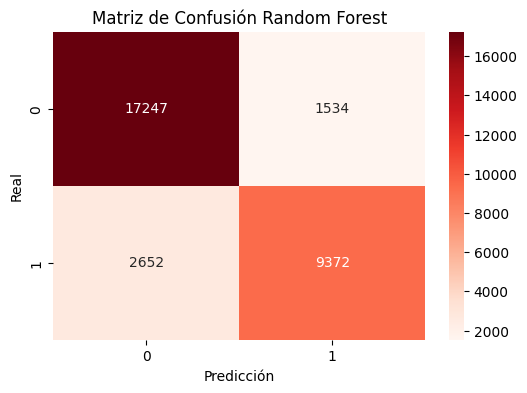

In [ ]:
# Graficamos la matriz de confusión para visualizar aciertos y errores del modelo.


matriz = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Reds')
plt.title("Matriz de Confusión Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



El modelo Random Forest obtiene un 86% de accuracy y predice muy bien las reservas que no se cancelan. Sin embargo, aún tiene dificultad para detectar todas las cancelaciones reales, como se ve en los 2652 falsos negativos. Aun así, con un F1-score de 0.86, el modelo es útil para estimar el riesgo de cancelación y puede mejorar ajustando el umbral de predicción.

XGBClassifier

In [ ]:
# Separamos las variables predictoras (X) y la variable objetivo (y = is_canceled).

X = df_model.drop("is_canceled", axis=1)
y = df_model["is_canceled"]


In [ ]:
# Dividimos los datos en entrenamiento y prueba manteniendo la proporción de clases con stratify.


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=40, stratify=y
)


In [ ]:
# Creamos el modelo XGBoost definiendo parámetros como learning_rate, max_depth y n_estimators.


xgb = XGBClassifier(
    random_state=40,
    eval_metric='logloss', 
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)
# Entrenamos el modelo con los datos de entrenamiento.


xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
# Calculamos accuracy, matriz de confusión y classification_report para evaluar el rendimiento general.


xgb_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Accuracy: 0.8389222528810258
[[17292  1489]
 [ 3473  8551]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     18781
           1       0.85      0.71      0.78     12024

    accuracy                           0.84     30805
   macro avg       0.84      0.82      0.82     30805
weighted avg       0.84      0.84      0.84     30805



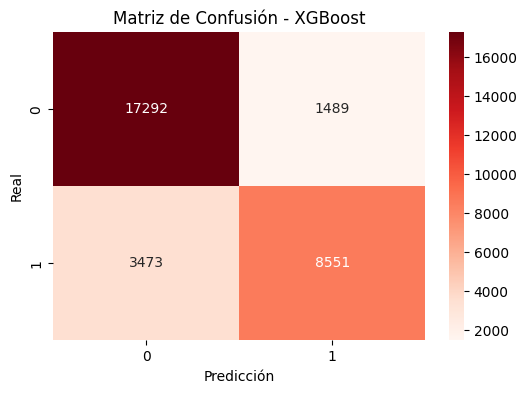

In [2504]:
cm = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


El modelo XGBoost logra un buen desempeño general y clasifica correctamente la mayoría de las reservas que no se cancelan, pero reduce más el recall para cancelaciones reales en comparación con Random Forest. Esto se refleja en un número mayor de falsos negativos (3473), a pesar de que su accuracy es bueno, el modelo puede mejorar ajustando el umbral o afinando hiperparámetros para detectar mejor la clase positiva.